Instructions: there are 3 problems to consider in about 5 minutes. Feel free to attempt them in any order and move on to another question if you get stuck.

The aim is to assess problem solving and some general machine learning principles, rather than knowledge/memory of particular packages/commands. We appreciate that python/jupter notebooks/tensorflow-keras will not be everyone's preferred choices.

So please share your thinking and feel free to ask questions!

(shift+enter to run cells)

In [436]:
# import packages (just run this)

import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd

------------------------------------------------------------------
Problem 1: We've carried out a quick preliminary experiment, scanning a parameter z to find the response of a signal, P. Choose appropriate parameters for z in the next scan to clearly visualise the signal.

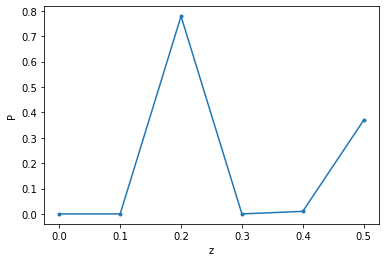

In [444]:
z = np.arange(0,0.6,0.1) # scan settings

P = np.exp(-( (z-0.21)/0.02 )**2) + 2*np.exp(-( (z-0.63)/0.1 )**2)
plt.plot(z, P, '.-')
plt.xlabel('z');plt.ylabel('P')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------
Problem 2: Modify the 'categorise' function so that in addition to printing whether a number is 'low' or 'high', it also prints 'divisible by 10' *on the same line* if this condition is met (i.e. value % 10 == 0)

Don't worry about being concise...

In [445]:
def categorise(signal):
    for value in signal:
        if value < 100:
            print(value, 'low')
        else:
            print(value, 'high')

signal = [1, 42, 70, 100, 139, 150]

categorise(signal)

1 low
42 low
70 low
100 high
139 high
150 high


-------------------------------------------------------------------------------------------------------------------------------
Problem 3: Image generation. 

Below is a simple machine learning example, with a set of mock images of an electron beam on a screen and corresponding positions of the centre of the beam in x and y.

A model is trained with the centroid positions as inputs and the beam images as outputs, so that we can then predict beam images from the centroid positions.

Edit the example and/or make suggestions to improve performance.

In [446]:
# Generate the dataset to work with (you can edit this, though we're probably more interested in the model)

# An (N x 2) array describing offsets in x and y, and a corresponding array of images

def generate_data(num_examples, num_pix):
    np.random.seed(1)
    
    offsets = np.zeros((num_examples, 2))
    images = np.zeros((num_examples, num_pix, num_pix))
    
    x = np.linspace(-10, 10, num_pix)
    y = np.linspace(-10, 10, num_pix)
    x, y = np.meshgrid(x, y)
    
    for n in np.arange(num_examples):
        sigma = 3
        offset_x = 10.*(np.random.rand() - 0.5)
        offset_y = 10.*(np.random.rand() - 0.5)
        offsets[n, :] = [offset_x, offset_y]
        images[n, :, :] = (1/(2*np.pi*sigma*sigma) * np.exp(-((x-offset_x)**2/(2*sigma**2) + (y-offset_y)**2/(2*sigma**2))))
        
    return offsets, images

num_examples = 10000
num_pixels = 20
offsets, images = generate_data(num_examples, num_pixels)

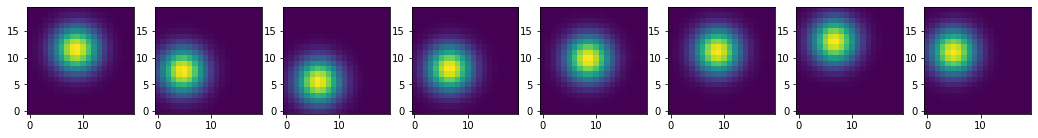

In [447]:
# Plot some training images (no need to edit)

fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(18,16))
for colnum, col in enumerate(ax):
    col.imshow(images[colnum, :, :], origin='lower')

In [452]:
# Set up and train a model to map offset to images

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
#from tensorflow import random
#random.set_seed(2)

model = Sequential()
model.add(Dense(2))
model.add(Dense(50))
model.add(Dense(num_pixels*num_pixels))

optimizer = RMSprop()
model.compile(optimizer = optimizer, loss='mse')

images_flattened = images.reshape(num_examples, num_pixels*num_pixels) # flatten 2D image array
history = model.fit(offsets, images_flattened, epochs=2)

Train on 10000 samples
Epoch 1/2
10000/10000 [==============================] - 2s 160us/sample - loss: 0.0022
Epoch 2/2
10000/10000 [==============================] - 1s 71us/sample - loss: 6.3971e-05


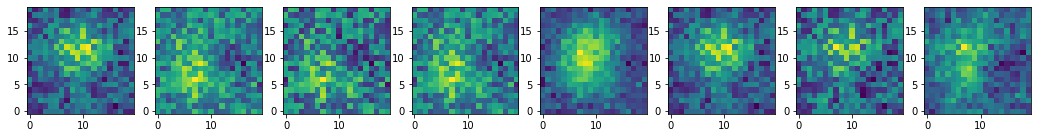

In [453]:
# Generate and plot some image predictions (no need to edit)

# (predicting on training data for simplicity!)

images_preds = model.predict(offsets).reshape(num_examples, num_pixels, num_pixels) # predict and reshape back to 2D

fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(18,16))
for colnum, col in enumerate(ax):
    col.imshow(images_preds[colnum, :, :], origin='lower')